#Deteksi Kesehatan Tanaman Berdasarkan Gambar

##Import Libraries

In [ ]:
import tensorflow as tf
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import pathlib
from google.colab import files

##Download Dataset

In [ ]:
od.download("https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wahyunandanicola
Your Kaggle Key: ··········


100%|██████████| 2.04G/2.04G [02:17<00:00, 16.0MB/s]


In [ ]:
%cd plantvillage-dataset

/content/plantvillage-dataset


##Image Augmentation

In [ ]:
trainings_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=30,
    fill_mode='nearest',
    validation_split=0.4
    )

val_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.4)

##Split Dataset

In [ ]:
base_dir = '/content/plantvillage-dataset/plantvillage dataset/color'
train_generator = trainings_datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    seed=42,
    target_size=(150,150), 
    shuffle=True,
    subset='training')
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    seed=42,
    class_mode='categorical',
    target_size=(150,150),
    subset='validation')

Found 32598 images belonging to 38 classes.
Found 21707 images belonging to 38 classes.


##Modelling

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_accuracy')>0.93):
#       if(logs.get('accuracy')>0.93):
#         print("\nTRAINING AKAN BERHENTI KETIKA AKURASI MODEL SUDAH LEBIH DARI 93%!")
#         self.model.stop_training = True

# callbacks = myCallback()

##Callback Option

In [ ]:
callback_cp = tf.keras.callbacks.ModelCheckpoint(
    filepath="/tmp/best-weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", #hdf5 = h5 (versi singkat)
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)
callback_es = tf.keras.callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=20)

##Trainning Model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.98):
      if(logs.get('accuracy')>0.98):
        print("\nTRAINING AKAN BERHENTI KETIKA AKURASI MODEL SUDAH LEBIH DARI 98%!")
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
 model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=128, 
        epochs=30, 
        validation_data=validation_generator,
        callbacks=[callbacks],
        validation_steps=5,  
        verbose=1)

Epoch 1/30
128/128 [==============================] - 35s 209ms/step - loss: 3.3041 - accuracy: 0.1375 - val_loss: 2.9386 - val_accuracy: 0.2188
Epoch 2/30
128/128 [==============================] - 27s 208ms/step - loss: 2.8638 - accuracy: 0.2444 - val_loss: 2.8168 - val_accuracy: 0.2812
Epoch 3/30
128/128 [==============================] - 26s 206ms/step - loss: 2.5403 - accuracy: 0.3059 - val_loss: 2.3413 - val_accuracy: 0.3688
Epoch 4/30
128/128 [==============================] - 28s 222ms/step - loss: 2.3548 - accuracy: 0.3555 - val_loss: 2.3950 - val_accuracy: 0.3438
Epoch 5/30
128/128 [==============================] - 32s 252ms/step - loss: 2.1835 - accuracy: 0.3811 - val_loss: 2.1638 - val_accuracy: 0.3938
Epoch 6/30
128/128 [==============================] - 27s 209ms/step - loss: 2.0343 - accuracy: 0.4261 - val_loss: 1.8757 - val_accuracy: 0.4437
Epoch 7/30
128/128 [==============================] - 27s 214ms/step - loss: 1.8826 - accuracy: 0.4692 - val_loss: 1.9976 - val_ac

##Visualisasi Akurasi dan Loss

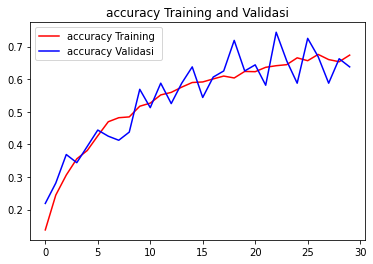

<Figure size 432x288 with 0 Axes>

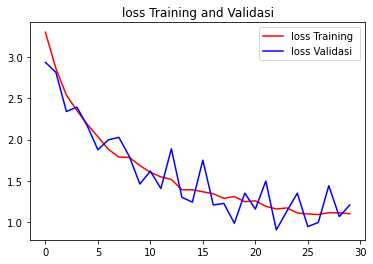

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='accuracy Training ')
plt.plot(epochs, val_acc, 'b', label='accuracy Validasi')
plt.title('accuracy Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='loss Training ')
plt.plot(epochs, val_loss, 'b', label='loss Validasi')
plt.title('loss Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

##Improve Model with Transfer Learning (with MobileNet v2)

###Create and Train Model

In [ ]:
import zipfile
import os
import random
import math
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from google.colab import files
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

First, instantiate a base model with pre-trained weights.

In [ ]:
# The base model is the model that is pre-trained. 
# We will create a base model using MobileNet V2.

base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False  # Do not include the ImageNet classifier at the top.
)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Unfreeze the base model
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(38, activation='softmax')]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5), # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

history = model.fit(
    train_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)

Epoch 1/30
1019/1019 [==============================] - 259s 251ms/step - loss: 3.5874 - categorical_accuracy: 0.1147 - val_loss: 3.0247 - val_categorical_accuracy: 0.1967
Epoch 2/30
1019/1019 [==============================] - 249s 244ms/step - loss: 2.7572 - categorical_accuracy: 0.2699 - val_loss: 2.4453 - val_categorical_accuracy: 0.3469
Epoch 3/30
1019/1019 [==============================] - 248s 243ms/step - loss: 2.2905 - categorical_accuracy: 0.3989 - val_loss: 2.0543 - val_categorical_accuracy: 0.4409
Epoch 4/30
1019/1019 [==============================] - 250s 245ms/step - loss: 1.9755 - categorical_accuracy: 0.4816 - val_loss: 1.7817 - val_categorical_accuracy: 0.5056
Epoch 5/30
1019/1019 [==============================] - 245s 241ms/step - loss: 1.7407 - categorical_accuracy: 0.5475 - val_loss: 1.5715 - val_categorical_accuracy: 0.5643
Epoch 6/30
1019/1019 [==============================] - 248s 243ms/step - loss: 1.5665 - categorical_accuracy: 0.5905 - val_loss: 1.4161 - v

###Prediksi Model

Saving 000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG to 000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
1/1 [==============================] - 0s 20ms/step
[[4.29319916e-03 6.72616949e-03 4.53874236e-03 5.99601455e-02
  2.05490692e-03 6.81003602e-03 2.01564573e-04 9.60598420e-03
  3.52435489e-03 1.78513955e-02 2.80963868e-01 1.87627273e-03
  9.01895342e-04 2.18284922e-03 7.93308835e-04 1.07159644e-01
  3.39757860e-01 4.61684316e-02 4.90795076e-03 2.68593896e-04
  9.12219461e-04 1.24482578e-03 2.91949487e-04 6.52966439e-04
  4.57264762e-03 4.02529258e-03 6.38077501e-03 2.07351171e-03
  1.04238163e-03 1.37871003e-03 3.96408048e-03 1.72433129e-03
  4.43277368e-03 3.31424153e-03 2.36448180e-03 1.64823718e-02
  7.00478326e-04 4.38948348e-02]]
tidak diketahui


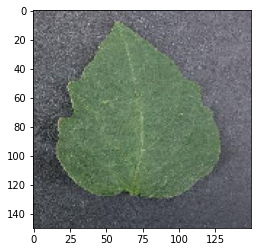

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(classes)
  if classes[0,0]==1:
   print('Apple___Apple_scab')
  elif classes[0,1]==1:
   print('Apple___Black_rot')
  elif classes[0,2]==1:
   print('Apple___Cedar_apple_rust')
  elif classes[0,3]==1:
   print('Apple___healthy')
  elif classes[0,4]==1:
   print('Blueberry___healthy')
  elif classes[0,5]==1:
   print('Cherry_(including_sour)___Powdery_mildew')
  elif classes[0,6]==1:
   print('Cherry_(including_sour)___healthy')
  elif classes[0,7]==1:
   print('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
  elif classes[0,8]==1:
   print('Corn_(maize)___Common_rust_')
  elif classes[0,9]==1:
   print('Corn_(maize)___Northern_Leaf_Blight')
  elif classes[0,10]==1:
   print('Corn_(maize)___healthy')
  elif classes[0,11]==1:
   print('Grape___Black_rot')
  elif classes[0,12]==1:
   print('Grape___Esca_(Black_Measles)')
  elif classes[0,13]==1:
   print('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
  elif classes[0,14]==1:
   print('Grape___healthy')
  elif classes[0,15]==1:
   print('Orange___Haunglongbing_(Citrus_greening)')
  elif classes[0,16]==1:
   print('Peach___Bacterial_spot')
  elif classes[0,17]==1:
   print('Peach___healthy')
  elif classes[0,18]==1:
   print('Pepper,_bell___Bacterial_spot')
  elif classes[0,19]==1:
   print('Pepper,_bell___healthy')
  elif classes[0,20]==1:
   print('Potato___Early_blight')
  elif classes[0,21]==1:
   print('Potato___Late_blight')
  elif classes[0,22]==1:
   print('Potato___healthy')
  elif classes[0,23]==1:
   print('Raspberry___healthy')
  elif classes[0,24]==1:
   print('Soybean___healthy')
  elif classes[0,25]==1:
   print('Soybean___healthy')
  elif classes[0,26]==1:
   print('Squash___Powdery_mildew')
  elif classes[0,27]==1:
   print('Squash___Powdery_mildew')
  elif classes[0,28]==1:
   print('Strawberry___Leaf_scorch')
  elif classes[0,29]==1:
   print('Strawberry___healthy')
  elif classes[0,30]==1:
   print('Tomato___Bacterial_spot')
  elif classes[0,31]==1:
   print('Tomato___Early_blight')
  elif classes[0,32]==1:
   print('Tomato___Late_blight')
  elif classes[0,33]==1:
   print('Tomato___Leaf_Mold')
  elif classes[0,34]==1:
   print('Tomato___Septoria_leaf_spot')
  elif classes[0,35]==1:
   print('Tomato___Target_Spot')
  elif classes[0,36]==1:
   print('Tomato___Tomato_Yellow_Leaf_Curl_Viruss')
  elif classes[0,37]==1:
   print('Tomato___healthy')
  else :
    print('tidak diketahui')